In [3]:
import numpy as np

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
import torch
from torchvision import datasets

In [8]:
mnist = datasets.MNIST('~/datasets/mnist', train=True, download=True)

In [10]:
type(mnist)

torchvision.datasets.mnist.MNIST

In [13]:
mnist_train = (mnist.data[:50000], mnist.targets[:50000])
mnist_test = (mnist.data[50000:], mnist.targets[:50000])


In [19]:
from pprint import pprint
import matplotlib.pyplot as plt

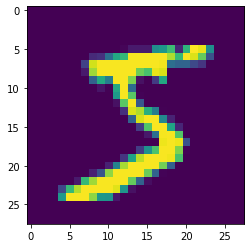

In [28]:


plt.imshow(mnist_train[0][0])


In [39]:
x = torch.tensor([1.], requires_grad = True)
print(x.grad)


None


In [44]:
y = x*x*x
y.backward()
.zero_grad()
print(y)

TypeError: __init__() missing 1 required positional argument: 'params'

In [42]:
print(x.grad)

tensor([6.])


In [47]:
xx = torch.tensor([2.], requires_grad = True)
yy = xx**2
yy.backward()
xx.grad

tensor([4.])

In [52]:
from torch import nn
one = torch.ones([4,3,4], requires_grad=True)
lin1 = nn.Linear(4,3, bias=False)
sig1 = nn.Sigmoid()
output = lin1(one)
real = sig1(output)

In [54]:
real, output

(tensor([[[0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827]],
 
         [[0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827]],
 
         [[0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827]],
 
         [[0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827],
          [0.7793, 0.5962, 0.3827]]], grad_fn=<SigmoidBackward>),
 tensor([[[ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780]],
 
         [[ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780]],
 
         [[ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780]],
 
         [[ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780],
          [ 1.2618,  0.3895, -0.4780]]], grad_fn=<UnsafeViewBackward>))

In [55]:
block = nn.Sequential(lin1, sig1)
kk = torch.ones(4,3,4, requires_grad=True)

In [56]:
real2 = block(kk)
real2

tensor([[[0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827]],

        [[0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827]],

        [[0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827]],

        [[0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827],
         [0.7793, 0.5962, 0.3827]]], grad_fn=<SigmoidBackward>)

In [72]:
class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    # Call to the __init__ function of the super class
    super(MultilayerPerceptron, self).__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size 
    self.hidden_size = hidden_size 
    self.output_size = output_size

    # Defining of our layers
    self.linear = nn.Linear(self.input_size, self.hidden_size, bias=False)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(self.hidden_size, self.output_size, bias=False)
    self.sigmoid = nn.Sigmoid()
    

    
  def forward(self, x):
    linear = self.linear(x)
    relu = self.relu(linear)
    linear2 = self.linear2(relu)
    output = self.sigmoid(linear2)
    return output

In [73]:
aa = torch.rand(3,5, requires_grad=True)

In [79]:
model = MultilayerPerceptron(5,4,2)
model(aa)

tensor([[0.5622, 0.4449],
        [0.6059, 0.4040],
        [0.5992, 0.4171]], grad_fn=<SigmoidBackward>)

In [80]:
model.forward(aa)

tensor([[0.5622, 0.4449],
        [0.6059, 0.4040],
        [0.5992, 0.4171]], grad_fn=<SigmoidBackward>)

In [81]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2787, -0.3473,  0.2420, -0.1456,  0.3778],
         [ 0.3231,  0.0079, -0.4211, -0.2332,  0.2256],
         [ 0.3779, -0.1258,  0.2214,  0.3643, -0.0316],
         [-0.0176,  0.1628, -0.2042, -0.1476, -0.1989]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0947,  0.0968,  0.4890, -0.0939],
         [-0.4507, -0.2543, -0.1542, -0.2308]], requires_grad=True)]

In [82]:
list(model.parameters())[0]

Parameter containing:
tensor([[ 0.2787, -0.3473,  0.2420, -0.1456,  0.3778],
        [ 0.3231,  0.0079, -0.4211, -0.2332,  0.2256],
        [ 0.3779, -0.1258,  0.2214,  0.3643, -0.0316],
        [-0.0176,  0.1628, -0.2042, -0.1476, -0.1989]], requires_grad=True)

In [83]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [90]:
lossfunc = nn.BCELoss()
lossfunc2 = nn.CrossEntropyLoss()

In [115]:
y = torch.ones(3,2)

In [116]:
loss = lossfunc(model(aa), y)
loss

tensor(0.6966, grad_fn=<BinaryCrossEntropyBackward>)

In [111]:
model_multinomial = MultilayerPerceptron(5,4,3)

yy = torch.tensor([[1,0,0],[0,1,0],[0,0,1]])
xx = torch.rand(3,5, 5)
yy_pred = model_multinomial(xx)

In [112]:
loss2 = lossfunc2(yy_pred,yy)
loss2

tensor(1.6082, grad_fn=<NllLoss2DBackward>)

In [107]:
yy_pred.shape

torch.Size([3, 5, 3])

In [108]:
yy.shape

torch.Size([3, 3])

In [216]:
class Test(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Test, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.lin1 = nn.Linear(input_size, hidden_size, bias = False)
        self.sig = nn.Sigmoid()
        self.lin2 = nn.Linear(hidden_size, output_size, bias=False)
        self.relu = nn.ReLU()
        self.soft = nn.Softmax(dim=1)
        
        self.model = nn.Sequential(
            self.lin1,
            self.relu,
            self.lin2,
            self.soft
            )
    def forward(self, x):
        output = self.model(x)
        return output

In [217]:
x = torch.rand(3,4,3)


In [218]:
model = Test(3,5,4)

output = model(x)
output

tensor([[[0.2506, 0.2463, 0.2434, 0.2545],
         [0.2536, 0.2431, 0.2371, 0.2591],
         [0.2485, 0.2494, 0.2493, 0.2502],
         [0.2474, 0.2612, 0.2701, 0.2362]],

        [[0.2477, 0.2495, 0.2495, 0.2490],
         [0.2548, 0.2699, 0.2825, 0.2269],
         [0.2434, 0.2267, 0.2132, 0.2796],
         [0.2540, 0.2539, 0.2549, 0.2445]],

        [[0.2514, 0.2350, 0.2242, 0.2694],
         [0.2571, 0.2455, 0.2398, 0.2560],
         [0.2470, 0.2656, 0.2778, 0.2308],
         [0.2446, 0.2539, 0.2582, 0.2437]]], grad_fn=<SoftmaxBackward>)

In [178]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3955,  0.0325, -0.2553],
         [-0.0396, -0.0960,  0.2772],
         [ 0.2617, -0.0070, -0.1547],
         [ 0.4051, -0.4362,  0.5070],
         [-0.2186,  0.4014,  0.1879]], requires_grad=True),
 Parameter containing:
 tensor([[-0.0454,  0.2352, -0.0079, -0.4468,  0.3154],
         [ 0.1893,  0.2875, -0.0810, -0.3082, -0.2136],
         [ 0.3199,  0.4113, -0.2049, -0.3380,  0.4086],
         [ 0.3112,  0.1009, -0.1175, -0.2523,  0.2903]], requires_grad=True)]

In [179]:
target = torch.tensor([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
print(target)
lossfunction = nn.CrossEntropyLoss()
loss = lossfunction(output, target)
loss

tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]])


tensor(1.3891, grad_fn=<NllLoss2DBackward>)

In [220]:
uu = torch.empty(3, dtype=torch.long).random_(5)
uu

tensor([2, 1, 3])

In [225]:
print(model.parameters)
for w in model.parameters():
    print(w, 'and')
    print(w.norm().pow(2))

<bound method Module.parameters of Test(
  (lin1): Linear(in_features=3, out_features=5, bias=False)
  (sig): Sigmoid()
  (lin2): Linear(in_features=5, out_features=4, bias=False)
  (relu): ReLU()
  (soft): Softmax(dim=1)
  (model): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=False)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=4, bias=False)
    (3): Softmax(dim=1)
  )
)>
Parameter containing:
tensor([[-0.5516, -0.4179, -0.4992],
        [ 0.3858,  0.1969,  0.3017],
        [-0.5736,  0.1465, -0.4065],
        [-0.5598,  0.5602, -0.3259],
        [-0.4716, -0.2832, -0.4860]], requires_grad=True) and
tensor(2.7946, grad_fn=<PowBackward0>)
Parameter containing:
tensor([[-0.2866,  0.0941,  0.3425,  0.4371,  0.0651],
        [-0.1027,  0.2608, -0.2645, -0.1273,  0.0572],
        [-0.3248,  0.4120,  0.3613, -0.3663, -0.2086],
        [-0.2250, -0.3087,  0.4174,  0.2264,  0.1420]], requires_grad=True) and
tensor(1.5466, grad_fn=<PowBackward0>)


## Negative Log Liklihood

In [244]:
# NLL in CE
def nll (logits, y, reduction = 'mean'):
    return nn.functional.cross_entropy(logits, y, reduction=reduction)

class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        lin1 = nn.Linear(self.input_size, self.hidden_size)
        lin2 = nn.Linear(self.hidden_size, self.hidden_size)
        lin3 = nn.Linear(self.hidden_size, self.output_size)
        self.model = nn.Sequential(lin1, lin2, lin3)
    
    def forward(self, x):
        output = self.model(x)
        return output

In [245]:
x = torch.rand(3, 588) # minibatch = 3, dimension=588

In [246]:
mlp_pre = MLP(588, 390, 3)
logit = mlp_pre(x)

In [257]:
from pprint import pprint

y = torch.tensor([0,1,2])
yy = torch.tensor([[1,0,0],[0,1,0], [0,0,1]])
pprint(logit)
pprint(logit.shape)

pprint(y)
pprint(y.squeeze())

tensor([[0.0912, 0.1304, 0.1880],
        [0.1130, 0.1427, 0.0655],
        [0.1577, 0.1613, 0.0069]], grad_fn=<AddmmBackward>)
torch.Size([3, 3])
tensor([0, 1, 2])
tensor([0, 1, 2])


In [258]:
loss = nll(logit, y)

In [259]:
loss

tensor(1.1370, grad_fn=<NllLossBackward>)

In [260]:
loss2 = nll(logit, yy)

RuntimeError: 1D target tensor expected, multi-target not supported

In [276]:
def BCE(logit, y, reduction = 'mean'):
    return nn.functional.binary_cross_entropy_with_logits(logit, y, reduction=reduction)

loss3 = BCE(logit,y)

ValueError: Target size (torch.Size([3])) must be the same as input size (torch.Size([3, 3]))

In [287]:
model2 = MLP(588, 390, 2)
output2 = model2(x)
yyy = torch.tensor([[0,1],[0,1],[1,0]])
loss3 = BCE(output2, yyy)

RuntimeError: result type Float can't be cast to the desired output type Long

In [278]:
def CE(logit, y, reduction = 'mean'):
    return nn.CrossEntropyLoss(logit, y, reduction=reduction)

In [279]:
loss4=CE(logit,y)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [270]:
losss = nn.CrossEntropyLoss()

In [274]:
out = losss(logit,y)

In [272]:
out

tensor(1.1370, grad_fn=<NllLossBackward>)

In [296]:
t = torch.randn(3).random_(3)

In [304]:
for i in range(10):
    t = torch.randn(3).random_(2)
    print(t)

tensor([0., 1., 0.])
tensor([0., 0., 1.])
tensor([0., 1., 1.])
tensor([1., 0., 1.])
tensor([0., 1., 1.])
tensor([1., 0., 0.])
tensor([1., 1., 1.])
tensor([1., 0., 1.])
tensor([1., 0., 1.])
tensor([1., 1., 1.])


In [305]:
k = torch.randn(3)

In [306]:
k

tensor([-0.1369,  0.1305,  0.7945])

In [308]:
from torchvision import datasets

mnist = datasets.MNIST('~/datasets/mnist')

In [323]:
ttarget = mnist.targets[5000:]
ttarget

tensor([7, 3, 4,  ..., 5, 6, 8])

In [324]:
ttarget = ttarget[:,None]

In [325]:
ttarget

tensor([[7],
        [3],
        [4],
        ...,
        [5],
        [6],
        [8]])

In [326]:
mnist.data[0].shape

torch.Size([28, 28])

In [383]:
inputs = torch.tensor([[1,2,3], [2,3,4],[3,4,5]]).float()
target = torch.tensor([0,1,2])


In [384]:
CE = nn.functional.cross_entropy(inputs, target)

In [385]:
CE

tensor(1.4076)

In [369]:
inputs = torch.tensor([[1],[2],[3]]).float()
sig = nn.Sigmoid()
sig_value = sig(inputs)
target = torch.tensor([0,1,0]).float()
target = target[:,None]

In [365]:
BCE = nn.functional.binary_cross_entropy_with_logits(inputs, target)

In [366]:
BCE

tensor(1.4963)

In [371]:
BCE_pure = nn.functional.binary_cross_entropy(sig_value, target)

In [372]:
BCE_pure

tensor(1.4963)

In [376]:
loss = nn.BCELoss()

In [377]:
BCE_loss = loss(sig_value, target)

In [378]:
BCE_loss

tensor(1.4963)

In [379]:
loss_CE = nn.CrossEntropyLoss()

In [380]:
inputs = torch.tensor([[1,2,3], [2,3,4],[3,4,5]]).float()
target = torch.tensor([0,1,2])
CE_loss = loss_CE(inputs, target)

In [382]:
CE_loss

tensor(1.4076)

In [402]:
input_test = torch.tensor([[1,2], [2,0]]).float()
target_test = torch.tensor([1,0])
loss = nn.functional.cross_entropy(input_test, target_test, reduce = False)
loss

tensor([0.3133, 0.1269])

In [405]:
soft = nn.Softmax(dim=1)
softmax = soft(torch.tensor([[1,2],[2,0]]).float())
-torch.log(softmax)

tensor([[1.3133, 0.3133],
        [0.1269, 2.1269]])

In [400]:
logit = torch.tensor([[0.2689, 0.7311], [0.1192, 0.8808]])
label = torch.tensor([0,1])
logit * label

tensor([[0.0000, 0.7311],
        [0.0000, 0.8808]])

In [407]:
xxx = torch.tensor([1,4,3])
torch.argmax(xxx, dim=0)

tensor(1)

In [418]:
softmax = nn.Softmax(dim=1)
xxx = torch.tensor([[1,2,3],[2,3,4],[3,10,5]]).float()
prob = softmax(xxx)

In [419]:
prob

tensor([[9.0031e-02, 2.4473e-01, 6.6524e-01],
        [9.0031e-02, 2.4473e-01, 6.6524e-01],
        [9.0496e-04, 9.9241e-01, 6.6868e-03]])

In [412]:
torch.argmax(prob, dim=1)

tensor([2, 2, 2])

In [414]:
torch.randn(3,5)

tensor([[-0.6142,  0.2495,  0.9717,  1.4405,  0.3166],
        [ 0.3483, -0.9384,  1.2658, -0.1715, -1.9302],
        [ 0.1193,  0.8993,  1.9247, -0.1831, -1.8961]])

In [417]:
prob[:,0]

tensor([0.0900, 0.0900, 0.0900])

In [420]:
def nll(logits, y, reduction='mean'):
  return nn.functional.corss_entropy(logits, y, reduction=reduction)

In [422]:
env_w = torch.tensor([[0,1], [2,1]]).float()
torch.argmax(env_w, dim=1) == 0

tensor([False,  True])

In [444]:
kkk = torch.tensor([[1,2,3],[2,0,3],[10,7,100],[3,2,1]])
i = (torch.argmax(kkk, dim=1)==2).long()
i

tensor([1, 1, 1, 0])

In [432]:
env_w = torch.randn(10)
idx1 = (env_w.sigmoid()<=.5)
env_w

tensor([ 0.2047,  1.5099, -0.0528,  0.8642, -0.9265, -0.5631, -0.2989, -0.1078,
        -0.0600,  0.7134])

In [428]:
idx1

tensor([ True,  True, False, False, False, False, False, False, False, False])

In [439]:
a = (env_w>0)

In [440]:
a

tensor([ True,  True, False,  True, False, False, False, False, False,  True])

In [442]:
env_w[a]

tensor([0.2047, 1.5099, 0.8642, 0.7134])

In [445]:
len(kkk)

4

In [450]:
env_w = torch.randn(10,3)
print(env_w)
env_w[torch.tensor([1,2,3])]

tensor([[-1.0905, -0.5045,  1.7669],
        [-1.1513,  0.2408, -0.2407],
        [ 0.3860,  1.7952,  1.3887],
        [-2.2579, -1.0264, -1.8036],
        [ 0.5218,  0.0755,  0.4030],
        [ 1.1839, -0.5478, -0.3704],
        [-0.3142, -0.1052, -1.1031],
        [-1.4296,  0.4288, -0.2225],
        [-0.6343,  0.7277,  1.0312],
        [-1.3737,  0.8007, -1.4553]])


tensor([[-1.1513,  0.2408, -0.2407],
        [ 0.3860,  1.7952,  1.3887],
        [-2.2579, -1.0264, -1.8036]])

In [454]:
env_w = torch.randn(10,3).cuda().requires_grad_()
softmax = nn.Softmax(dim=1)
prob = softmax(env_w)
env_w, prob

(tensor([[-0.2363,  0.5511, -1.0261],
         [ 1.1669,  1.5775, -0.2689],
         [ 1.3777, -0.1930,  1.2618],
         [ 1.1656, -0.3159, -0.9256],
         [-0.5286,  1.8519,  0.1349],
         [ 0.1317,  0.4753, -0.9558],
         [ 1.3280, -0.9150, -1.1316],
         [-0.6113, -1.0027, -0.7086],
         [-1.1233, -0.4122,  1.2161],
         [-2.2251, -0.8956, -0.4658]], device='cuda:0', requires_grad=True),
 tensor([[0.2738, 0.6018, 0.1243],
         [0.3642, 0.5491, 0.0867],
         [0.4766, 0.0991, 0.4244],
         [0.7403, 0.1683, 0.0915],
         [0.0727, 0.7861, 0.1412],
         [0.3640, 0.5133, 0.1227],
         [0.8392, 0.0891, 0.0717],
         [0.3871, 0.2617, 0.3512],
         [0.0746, 0.1518, 0.7736],
         [0.0945, 0.3570, 0.5486]], device='cuda:0', grad_fn=<SoftmaxBackward>))

In [476]:
  class MLP(nn.Module):
    def __init__(self, hidden_dim = 200):
      super(MLP, self).__init__()
      self.lin1 = nn.Linear(2 * 14 * 14, hidden_dim) ### 3개 color (2->3)
      self.lin2 = nn.Linear(hidden_dim, hidden_dim)
      self.lin3 = nn.Linear(hidden_dim, 2) ### BCE -> CE (1 -> 3) (labels 개수 2-> 3)
      for lin in [self.lin1, self.lin2, self.lin3]:
        nn.init.xavier_uniform_(lin.weight)
        nn.init.zeros_(lin.bias)
      self._main = nn.Sequential(self.lin1, nn.ReLU(True), self.lin2, nn.ReLU(True), self.lin3)
    def forward(self, input):
      out = input.view(input.shape[0], 2 * 14 * 14)
      out = self._main(out)
      return out

In [477]:
model = MLP()
x = torch.randn(4,2*14*14)
output = model(x)

In [478]:
list(model.parameters())[0]

Parameter containing:
tensor([[-0.0152,  0.0816,  0.0182,  ..., -0.1005, -0.0725,  0.0252],
        [ 0.0641,  0.0112, -0.0026,  ..., -0.0389, -0.0109,  0.0107],
        [ 0.0976, -0.0488, -0.0081,  ..., -0.0971,  0.0455,  0.0012],
        ...,
        [ 0.0320,  0.0871, -0.0881,  ..., -0.0178, -0.0100, -0.0774],
        [-0.0219,  0.0786,  0.0338,  ...,  0.0893,  0.0385, -0.0558],
        [-0.0868,  0.0960, -0.0519,  ...,  0.0491,  0.0186, -0.0861]],
       requires_grad=True)

In [481]:
model2 = MLP()
x = torch.randn(5,2*14*14)
output = model2(x)

In [482]:
list(model.parameters())[0]

Parameter containing:
tensor([[-0.0152,  0.0816,  0.0182,  ..., -0.1005, -0.0725,  0.0252],
        [ 0.0641,  0.0112, -0.0026,  ..., -0.0389, -0.0109,  0.0107],
        [ 0.0976, -0.0488, -0.0081,  ..., -0.0971,  0.0455,  0.0012],
        ...,
        [ 0.0320,  0.0871, -0.0881,  ..., -0.0178, -0.0100, -0.0774],
        [-0.0219,  0.0786,  0.0338,  ...,  0.0893,  0.0385, -0.0558],
        [-0.0868,  0.0960, -0.0519,  ...,  0.0491,  0.0186, -0.0861]],
       requires_grad=True)

In [486]:
import random
random.choices(population=[1,2], weights=[0.2,0.8], k=10)

[2, 2, 2, 2, 1, 1, 2, 2, 2, 2]

In [487]:
aa = np.arange(0,3)
np.random.choice(np.delete(aa, 1))

2

In [490]:
kkk = random.choices(population=np.delete(aa,1), weights=[0.2,0.8], k=1)

In [492]:
kkk[0]

2